<a href="https://www.kaggle.com/code/mdbadrulislam/cnn-image-classification-using-resnet50?scriptVersionId=125070076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Residual Neural Network (ResNet)

### What is Resnet?

**ResNet**, short for **Residual Networks**,Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks. It is a convolutional neural network used as a backbone for many computer vision tasks. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers. It is an innovative neural network that was first introduced by **Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun** in their 2015 computer vision research paper titled ‘**Deep Residual Learning for Image Recognition**’.

ResNet has many variants that run on the same concept but have different numbers of layers. Resnet50 is used to denote the variant that can work with **50 neural network layers(48 Convolution layers along with 1 MaxPool and 1 Average Pool)** deep

### Why Resnet?

Convolutional Neural Networks have a major disadvantage — ‘**Vanishing Gradient Problem**’. During backpropagation, the value of gradient decreases significantly, thus hardly any change comes to weights. To overcome this, ResNet is used. It make use of “**SKIP CONNECTION**” which lies at the core of the residual blocks, is the strength of this type of neural network.

All algorithms train on the output ‘Y’ but, ResNet trains on F(X). In simpler words, ResNet tries to make F(X)=0 so that Y=X.

### What are Skip Connection ?

“**SKIP CONNECTION**”— Adding the original input to the output of the convolutional block.

![Skip connection](https://miro.medium.com/v2/resize:fit:640/format:webp/1*TlcuN-PjLbXYSYQKqpTIzw.png)

SKIP CONNECTION is a direct connection that skips over some layers of the model. The output is not the same due to this skip connection. Without the skip connection, input ‘X gets multiplied by the weights of the layer followed by adding a bias term.

Then comes the activation function, F() and we get the output as :

>F( w*x + b ) (=F(X))

But with skip connection technique, the output is :

>F(X)+x


In ResNet-50, there are two kinds of blocks -

* Identity Block
* Convolutional Block

The value of ‘x’ is added to the output layer if and only if the

>     input size == output size

If this is not the case, we add a ‘convolutional block’ in the shortcut path to make the input size equal to output size.

![Block](https://miro.medium.com/v2/resize:fit:720/0*2f4GK4NXT8w3svqg.JPG)

There are 2 ways to make the input size equal to the output size -

1. Padding the input volume,
2. Performing 1*1 convolutions.

Size of output layer is calculated using —
>     [{(n+2p-f)/s}+1]^2 

where,

n= input image size,

p=padding,

s=stride,

f=number of filters.

For, 1*1 convolutional layers, size of output layer =
>  (n/2)*(n/2)

given the input size is ‘n’.

In CNNs, to reduce the size of the image, pooling is used

### ResNet Architecture

The 50-layer ResNet architecture includes the following elements, as shown in the table below:

![ResNet](https://iq.opengenus.org/content/images/2020/03/Screenshot-from-2020-03-20-15-49-54.png)

* **A 7×7 kernel convolution** alongside 64 other kernels with a 2-sized stride.
* **A max pooling layer** with a 2-sized stride.
* **9 more layers**—3×3,64 kernel convolution, another with 1×1,64 kernels, and a third with 1×1,256 kernels. These 3 layers are repeated 3 times. 
* **12 more layers** with 1×1,128 kernels, 3×3,128 kernels, and 1×1,512 kernels, iterated 4 times.
* **18 more layers** with 1×1,256 cores, and 2 cores 3×3,256 and 1×1,1024, iterated 6 times.
* **9 more layers** with 1×1,512 cores, 3×3,512 cores, and 1×1,2048 cores iterated 3 times.

(up to this point the network has 50 layers)
* **Average pooling**, followed by a fully connected layer with 1000 nodes, using the softmax activation function.

### ResNet-50 Transfer Learning with Keras

Transfer learning means taking a pre-trained machine learning model and repurposing it for another related task for faster development. You can load a pretrained version of the neural network trained on more than a million images from the ImageNet database. The pretrained neural network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the neural network has learned rich feature representations for a wide range of images. It helps achieve higher performance even if the model is trained on a smaller dataset.

In [1]:
# Loading Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import cv2

from os import listdir
from os.path import isfile, join

A simple CNN model
```
model = Sequential()

# Input layer01
model.add(Conv2D())
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden layer01
model.add(Conv2D())
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden layer02
model.add(Conv2D())
model.add(MaxPooling2D(pool_size=(2,2)))


# Hidden layer03
model.add(Conv2D(128))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Fully connected Neural Network
model.add(Dense(128))
model.add(Dense(4096))
```

In [2]:
#  ResNet-50 neural network trained on the ImageNet data set
resnet = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 3s 0us/step


In [3]:
#show the base model summary 
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [4]:
#total layers
layers = resnet.layers
print(f'Number of Layers: {len(layers)} ')

Number of Layers: 177 


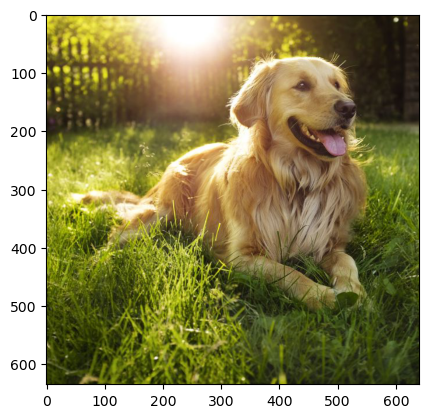

In [5]:
# test image
imageSrc = "../input/cat-or-dog-test/test1.jpg"
photo = plt.imread(imageSrc)
plt.imshow(photo)
plt.show()

#### image.load_img() Vs cv2.imread()
**OpenCV** reads images in **BGR** format whereas in **keras** (using PIL as a backend), it is represented in **RGB**. To get what we expect (RGB or BGR), simply reverse the channels to be in order:
> test_image = test_image[...,::-1]

Another point , **cv2.imread** usually reads in images in **uint8** precision. The output of keras loaded image data is in floating point precision so it may need to convert to a floating-point representation, such as float32:
> test_image = test_image[...,::-1].astype(np.float32)

**img_to_array()** method to convert images into array, and **array_to_img()** method to convert image array back to image. We can get information like image array shape, type, etc. When the image array is converted to an image, it again is a PIL object.


**vgg16.preprocess_input** will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [6]:
# image formation for model
img = image.load_img(imageSrc, target_size=(224,224))
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# tensor image to array
x = image.img_to_array(img)
print(type(x))

# expand shape of an array to store feature/classificaton related info
x = np.expand_dims(x, axis=0)
# prepare image for model
x = preprocess_input(x) 
x

<class 'PIL.Image.Image'>
None
RGB
(224, 224)
<class 'numpy.ndarray'>


array([[[[ -44.939003,  110.221   ,  104.32    ],
         [ -40.939003,  109.221   ,  105.32    ],
         [ -42.939003,  117.221   ,  112.32    ],
         ...,
         [ -83.939   ,  -77.779   ,  -71.68    ],
         [ -83.939   ,  -78.779   ,  -74.68    ],
         [ -86.939   ,  -81.779   ,  -77.68    ]],

        [[ -41.939003,  108.221   ,  104.32    ],
         [ -43.939003,  116.221   ,  111.32    ],
         [ -53.939003,  114.221   ,  109.32    ],
         ...,
         [ -80.939   ,  -76.779   ,  -70.68    ],
         [ -81.939   ,  -78.779   ,  -73.68    ],
         [ -84.939   ,  -81.779   ,  -76.68    ]],

        [[ -26.939003,  123.221   ,  119.32    ],
         [ -46.939003,  123.221   ,  118.32    ],
         [ -55.939003,  117.221   ,  111.32    ],
         ...,
         [ -81.939   ,  -76.779   ,  -72.68    ],
         [ -83.939   ,  -79.779   ,  -77.68    ],
         [ -84.939   ,  -82.779   ,  -80.68    ]],

        ...,

        [[ -97.939   ,  -65.779   ,  -

In [7]:
# predicted probabilities for each class
modelPredictions = resnet.predict(x)
modelPredictions

1/1 [==============================] - 2s 2s/step


array([[1.62860374e-07, 2.39858167e-07, 3.99628108e-09, 2.62053614e-08,
        1.59069433e-08, 7.21838100e-09, 1.91771541e-08, 9.29697137e-08,
        1.56742317e-07, 1.22122668e-08, 1.42814818e-08, 5.86292295e-08,
        2.10122394e-07, 1.48586663e-08, 1.43432857e-08, 2.42195473e-08,
        4.34966196e-09, 2.28931540e-08, 4.28363167e-09, 2.51442174e-08,
        1.67654193e-08, 3.35267414e-09, 9.90470905e-09, 3.90521876e-07,
        4.91791248e-08, 1.09106153e-07, 1.89171470e-08, 2.13751026e-08,
        3.83907768e-08, 1.59426094e-07, 4.44006645e-08, 2.46075196e-08,
        3.96394348e-08, 1.55223745e-08, 1.85614155e-08, 2.02505532e-08,
        4.51732198e-08, 1.03200769e-07, 3.03866221e-09, 1.31194739e-07,
        1.10276250e-08, 1.39913423e-08, 2.50147298e-08, 1.62728018e-08,
        1.27560389e-08, 1.89563014e-08, 6.29034602e-08, 1.60358606e-08,
        1.63312961e-07, 9.40105060e-09, 4.67030112e-08, 1.18975308e-07,
        1.25749811e-08, 6.72683420e-09, 1.63605947e-08, 5.662674

In [8]:
# convert probabilities to class labels
decode_predictions(modelPredictions, top=3)

35363/35363 [==============================] - 0s 0us/step


[[('n02099601', 'golden_retriever', 0.98011255),
  ('n02099712', 'Labrador_retriever', 0.009850978),
  ('n02102318', 'cocker_spaniel', 0.002392336)]]

In [9]:
# convert the probabilities to class labels
_, classname, accuracy = decode_predictions(modelPredictions, top=3)[0][0]
print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))

Predicted Class: golden retriever
Accuracy: 98.01%


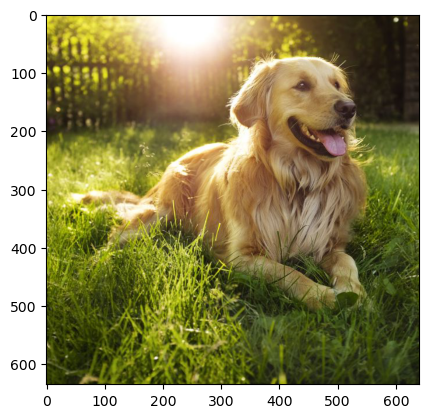

Predicted Class: golden retriever
Accuracy: 98.01%


In [10]:
# Image with label

plt.imshow(photo)
plt.show()

print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))

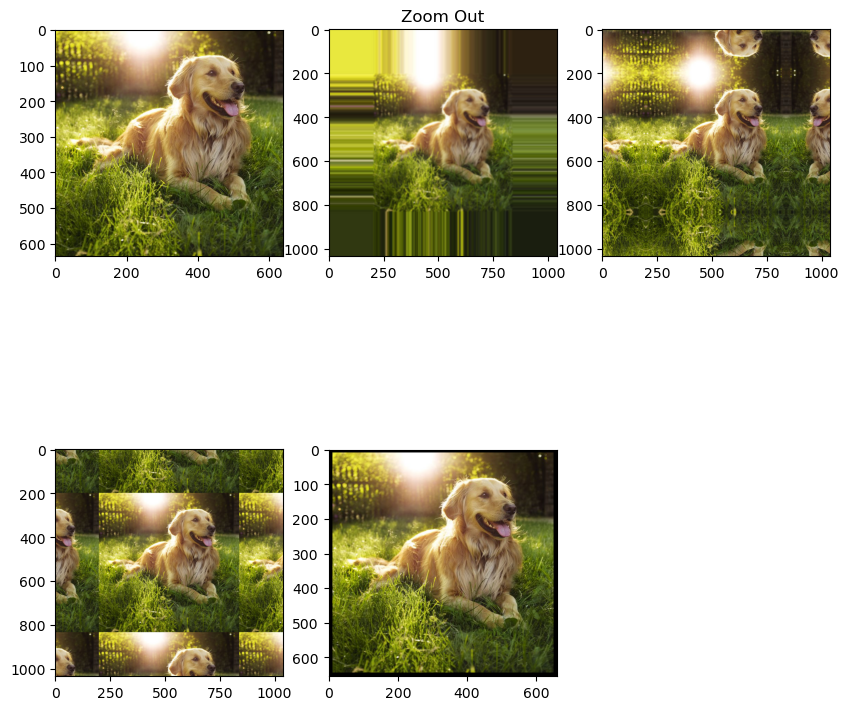

In [11]:
# Types of image Borders
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(photo)
plt.subplot(2,3,2)
# zoom out
img1 = cv2.copyMakeBorder(photo,200,200,200,200,cv2.BORDER_REPLICATE)
plt.imshow(img1,interpolation='bicubic')
plt.title("Zoom Out")
# Mirror
plt.subplot(2,3,3)
img2 = cv2.copyMakeBorder(photo,200,200,200,200,cv2.BORDER_REFLECT)
plt.imshow(img2)

plt.subplot(2,3,4)
img3 = cv2.copyMakeBorder(photo,200,200,200,200,cv2.BORDER_WRAP)
plt.imshow(img3)
# solid border
plt.subplot(2,3,5)
img4 = cv2.copyMakeBorder(photo,10,10,10,10,cv2.BORDER_CONSTANT)
plt.imshow(img4)

plt.show()

In [12]:
# Function for image labeling

def textOnImage(name, predictions, input_image):
    backgroundColor = [0, 0, 0]
    # add a border of the specified value around image
    # cv2.copyMakeBorder(src, top, bottom, left, right, borderType, color)
    expandImage = cv2.copyMakeBorder(input_image, 0, 0, 0, input_image.shape[1]+300, cv2.BORDER_CONSTANT, value=backgroundColor)
    # image shape
    image_width = input_image.shape[1]
    
    # loop for multiple predictions
    for (i, prediction) in enumerate(predictions):
        className = str(prediction[1]).replace("_",' ')
        percentage = str(round(prediction[2]*100,2))+"%"
        imageInfo = className + " " + percentage
        # text on image
        cv2.putText(expandImage, str(name), (image_width+50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
        cv2.putText(expandImage, imageInfo, (image_width+50, 50 + ((i + 1) * 50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
        
        plt.imshow(expandImage)
    plt.show()

In [13]:
# Retrive all file from target folder

# target folder location
imagePath = "../input/cat-or-dog-test/"
# fileName = []
# for f in listdir(imagePath):
#     filePath = join(imagePath, f)
#     if isfile(filePath):
#         fileName.append(f)
fileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]
fileName

['test2.jpg', 'test3.jpeg', 'test1.jpg', 'test4.jpeg']

1/1 [==============================] - 0s 147ms/step


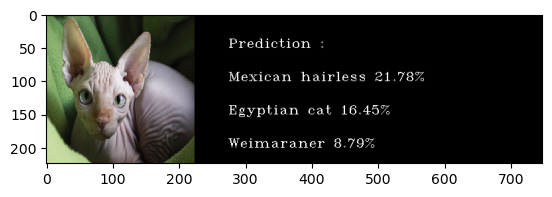

1/1 [==============================] - 0s 158ms/step


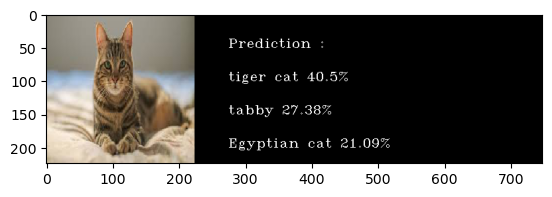

1/1 [==============================] - 0s 138ms/step


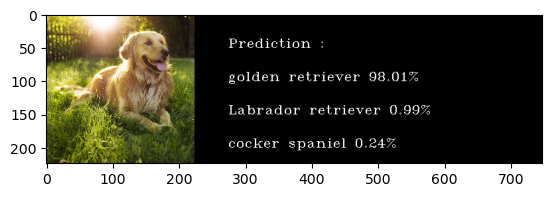

1/1 [==============================] - 0s 134ms/step


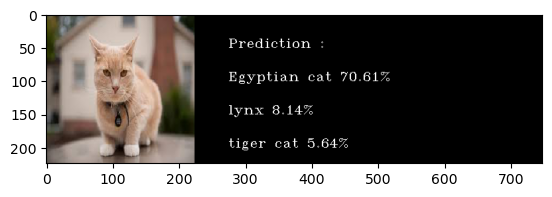

In [14]:
# Apply model on all images

for file in fileName:
# image preprocessing
    # loding image
    # image.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)
    img = image.load_img(imagePath + file, target_size=(224,224))
    # image tensor to array
    img = np.array(img)
    # expand shape of an array to store feature/classificaton related info
    x = np.expand_dims(img, axis=0)
    # Prepare image for model
    x = preprocess_input(x)
    
# image to model
    # predicted probabilities for each class
    predictions = resnet.predict(x)
    # convert probabilities to class labels
    predictions = decode_predictions(predictions, top=3)[0]
    # image with label
    textOnImage("Prediction :", predictions, img)